<a href="https://colab.research.google.com/github/adamsardo/awesome-cursorrules/blob/main/Copy_of_%5BBespoke_Curator%5D_Deepseek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="align-center">
  <a href="https://docs.bespokelabs.ai"><img src="https://raw.githubusercontent.com/bespokelabsai/curator/main/docs/Bespoke-Labs-Logo-on-Mint.png" width="500"></a><br>
  <h1>Bespoke Curator</h1>
  <h3>Data Curation for Post-Training & Structured Data Extraction</h3>
  <a href="https://discord.gg/KqpXvpzVBS">Join Discord.</a><br>
  <a href="https://docs.bespokelabs.ai">Docs.</a><br>
  <h2><a href="https://github.com/bespokelabsai/curator">Star⭐ us on Github</a></h2><br>
</div>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.environ["DEEPSEEK_API_KEY"] = "your_api_key"  # Get it from https://platform.deepseek.com

In [ ]:
!pip install bespokelabs-curator

In [ ]:
from bespokelabs import curator
from pydantic import BaseModel, Field
from datasets import Dataset

In [ ]:
class Story(BaseModel):
  title: str = Field(description="The title of the story")
  plot: str = Field(description="The story of the chinese lab")
  one_line_summary: str = Field(description="A one line summary of the story")

story_prompter = curator.LLM(
    prompt_func=lambda row: f"Tell me a story about {row['topic']}",
    model_name="deepseek/deepseek-chat",
    backend="litellm",
    response_format=Story,
    parse_func=lambda _, response: [{'title': response.title, 'summary': response.one_line_summary, 'plot':response.plot}]
)
topics = Dataset.from_dict({'topic': ['a chinese lab overcoming restrictions to make a powerful AI']})
d = story_prompter(topics)

2024-12-27 07:09:30,033 - bespokelabs.curator.request_processor.base_online_request_processor - INFO - Running LiteLLMOnlineRequestProcessor completions with model: deepseek/deepseek-chat
INFO:bespokelabs.curator.request_processor.base_online_request_processor:Running LiteLLMOnlineRequestProcessor completions with model: deepseek/deepseek-chat
2024-12-27 07:09:31,400 - bespokelabs.curator.request_processor.base_online_request_processor - WARNING - No manual max_requests_per_minute set, and headers based detection failed, using default value of 100
2024-12-27 07:09:31,408 - bespokelabs.curator.request_processor.base_online_request_processor - WARNING - No manual max_tokens_per_minute set, and headers based detection failed, using default value of 100000
Processing LiteLLMOnlineRequestProcessor requests: 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]
2024-12-27 07:09:41,068 - bespokelabs.curator.request_processor.base_online_request_processor - INFO - Processing complete. Results saved to

In [ ]:
from IPython.display import HTML, display
story = d[0]
display(HTML(
    f"<h1>{story['title']}</h1>"
    f"<h3>{story['summary']}</h3>"
    f"<p>{story['plot']}</p>"
))

In [ ]:
# Now let's see how to create some diverse stories!

class Topics(BaseModel):
  topics_list: list[str] = Field(description="A list of topics")

topics_prompter = curator.LLM(
    prompt_func=lambda: "Tell me 5 diverse topics that are each worthy of a story (e.g. a boy lost in the WWII).",
    model_name="deepseek/deepseek-chat",
    backend="litellm",
    response_format=Topics,
    parse_func=lambda _, response: [{'topic': t} for t in response.topics_list]
)
topics = topics_prompter()
topics.to_pandas()

,topic
0,A young girl discovers she has the ability to ...
1,A retired astronaut embarks on a secret missio...
2,"In a dystopian future, a group of teenagers un..."
3,A historian finds a hidden diary that reveals ...
4,A musician travels back in time to the 1960s t...


In [ ]:
# Generate the stories, one per topic!
stories = story_prompter(topics)

2024-12-27 07:10:17,862 - bespokelabs.curator.request_processor.base_online_request_processor - INFO - Running LiteLLMOnlineRequestProcessor completions with model: deepseek/deepseek-chat
INFO:bespokelabs.curator.request_processor.base_online_request_processor:Running LiteLLMOnlineRequestProcessor completions with model: deepseek/deepseek-chat
2024-12-27 07:10:19,216 - bespokelabs.curator.request_processor.base_online_request_processor - WARNING - No manual max_requests_per_minute set, and headers based detection failed, using default value of 100
2024-12-27 07:10:19,220 - bespokelabs.curator.request_processor.base_online_request_processor - WARNING - No manual max_tokens_per_minute set, and headers based detection failed, using default value of 100000
Processing LiteLLMOnlineRequestProcessor requests: 100%|██████████| 5/5 [00:08<00:00,  1.76s/it]
2024-12-27 07:10:28,019 - bespokelabs.curator.request_processor.base_online_request_processor - INFO - Processing complete. Results saved to

In [ ]:
stories.to_pandas()

,title,summary,plot
0,The Perfect Facade,Teenagers uncover the truth behind their socie...,"In a dystopian future, society appears to be a..."
1,Whispers of the Wild,A young girl with the ability to communicate w...,In a world where humans and nature are in cons...
2,The Last Mission,A retired astronaut leads a secret mission to ...,"Retired astronaut Captain Alex Morgan, once a ..."
3,The Time-Traveling Musician,A musician travels back to the 1960s to preven...,"In the year 2023, a struggling musician named ..."
4,The Lost Battalion: A Hidden Diary,A historian uncovers a hidden diary revealing ...,"In the quiet town of Verdun, France, historian..."


In [ ]:
for story in stories:
  display(HTML(
      f"<h1>{story['title']}</h1>"
      f"<h3>{story['summary']}</h3>"
      f"<p>{story['plot']}</p>"
  ))

## Curator viewer
If you use curator-viewer (available on local run), you can visualize and inspect outputs.

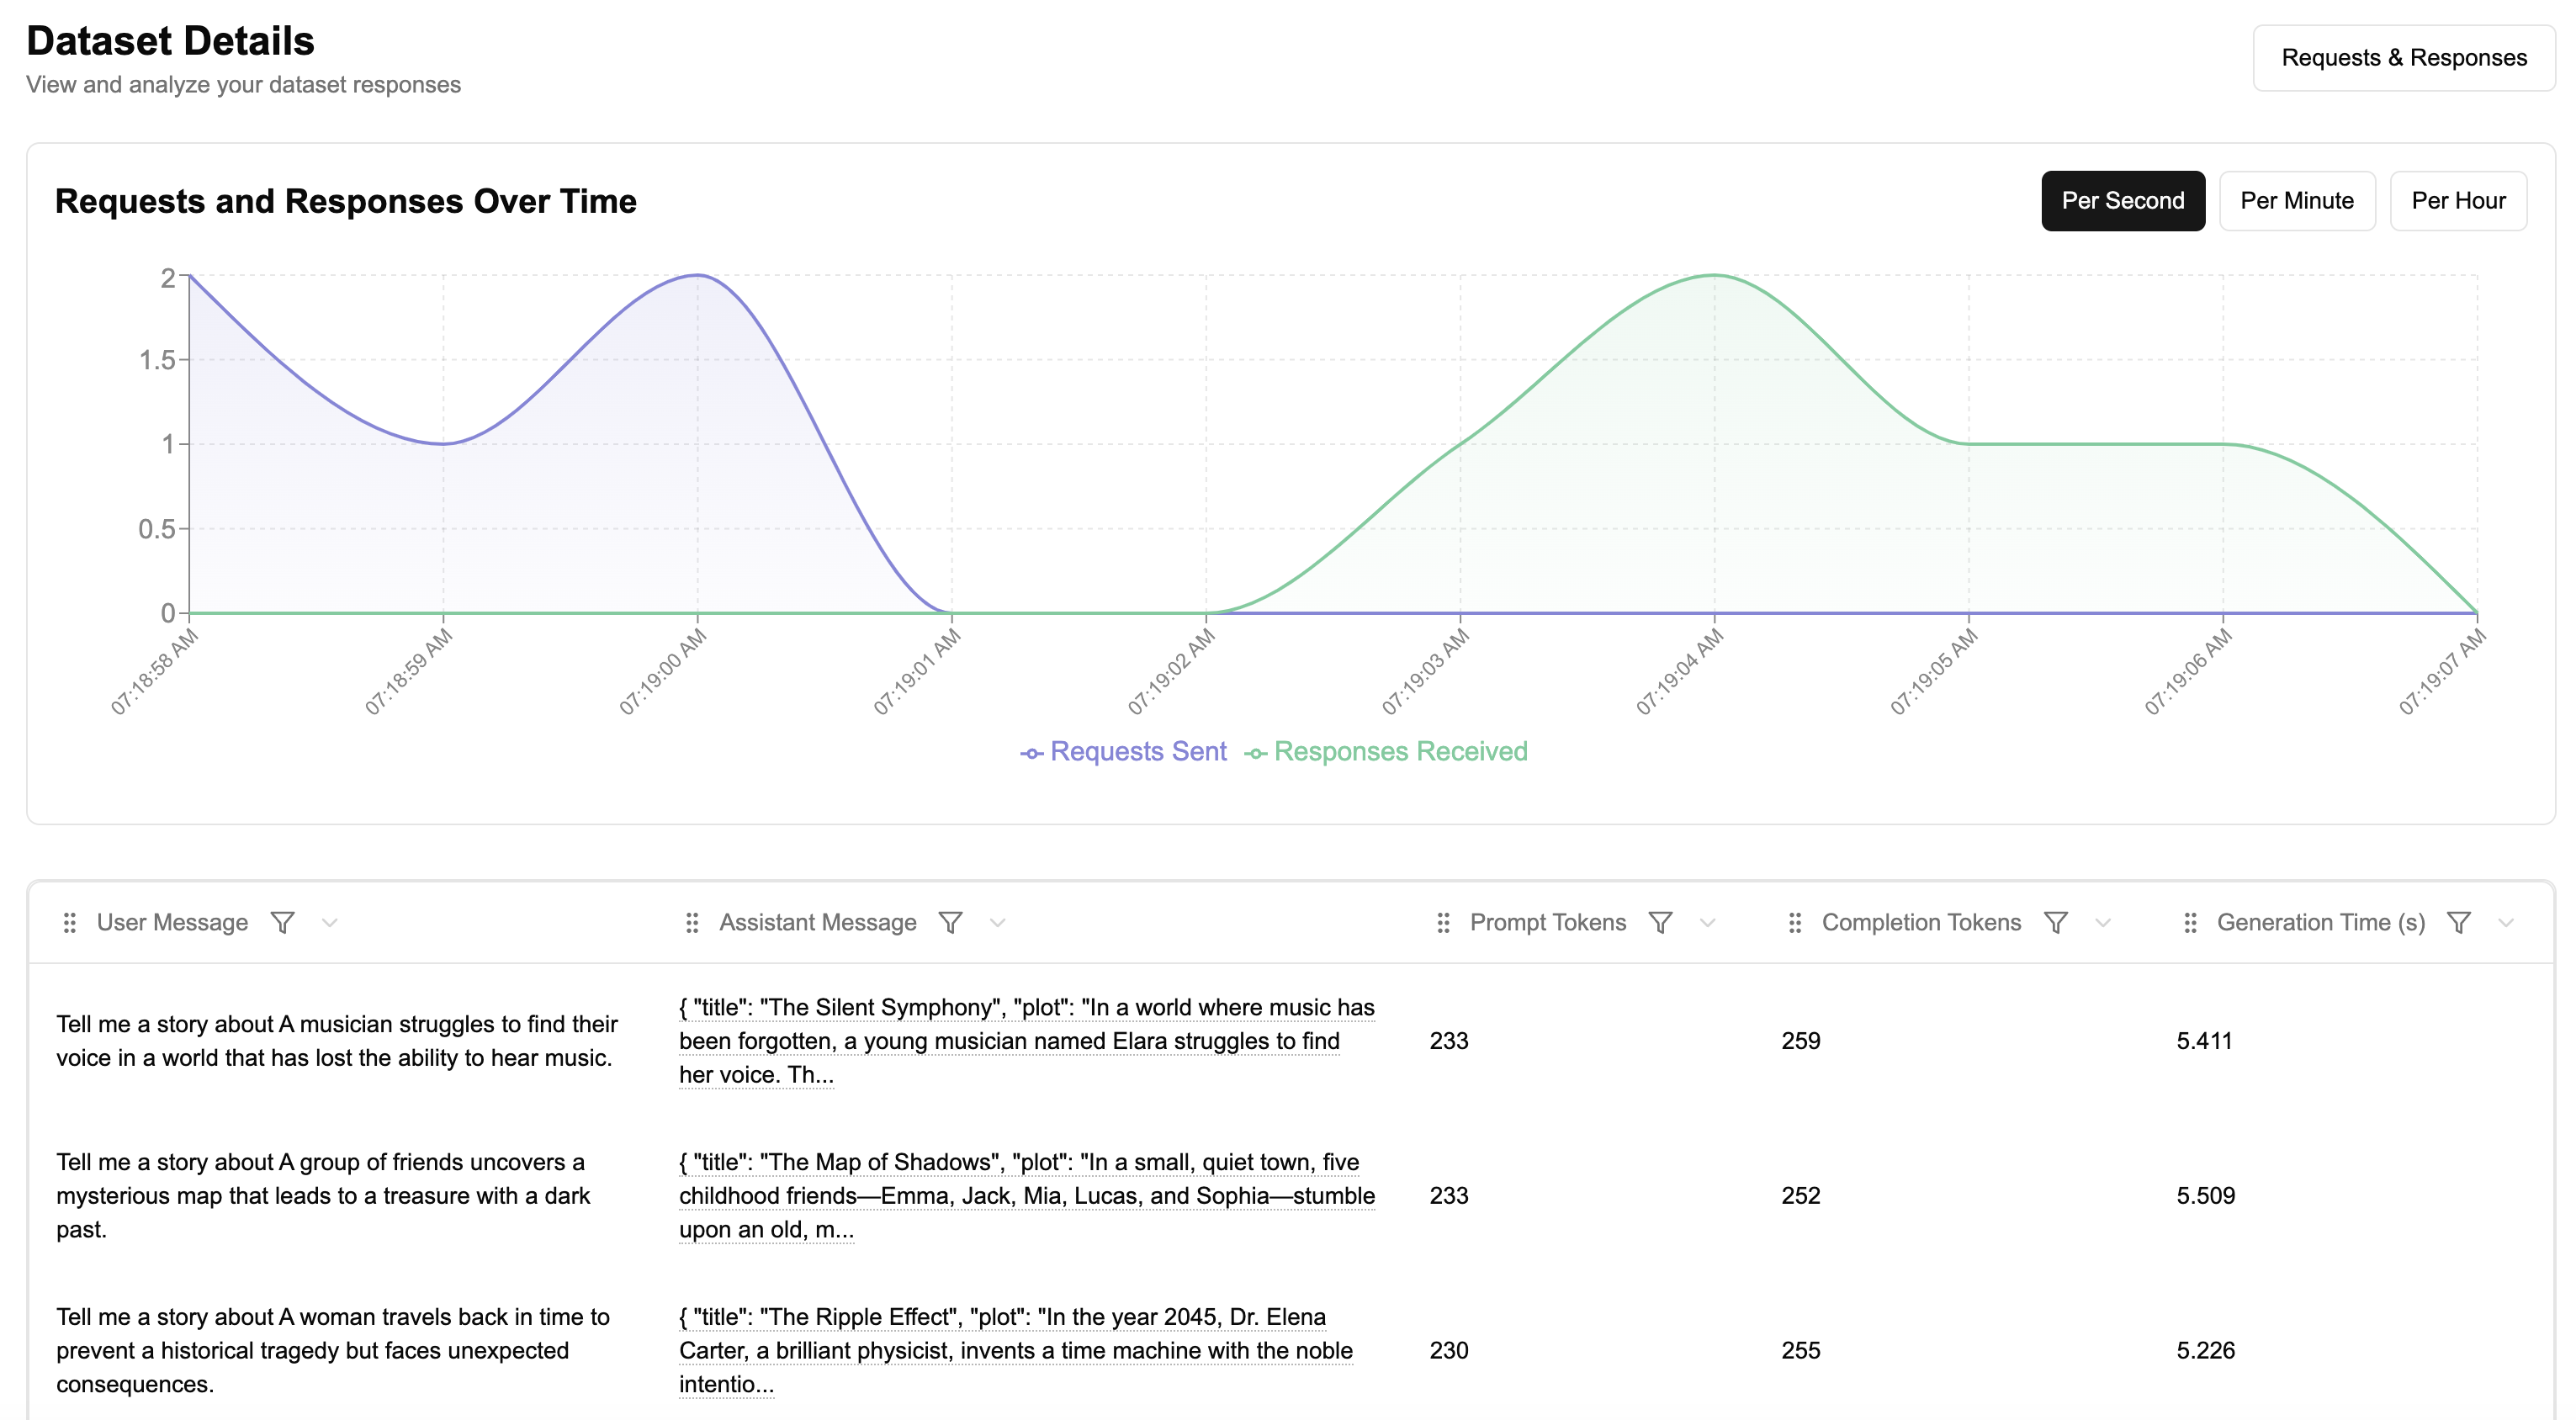
